In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [2]:
DATASET_PATH = 'https://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'

# Importing the dataset
data = pd.read_csv(DATASET_PATH, header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [4]:
# Features and Target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [5]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (4998, 140)
y shape:  (4998,)


In [6]:
# How many 1s and 0s are there in the target?
unique, counts = np.unique(y, return_counts=True)
for (u, c) in zip(unique, counts):
    print(f"{u}: {c}")

0.0: 2079
1.0: 2919


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Select features with target 1
X_train_1 = X_train[y_train == 1]

In [8]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_1 = scaler.fit_transform(X_train_1)
X_test = scaler.transform(X_test)

In [9]:
# Create the Autoencoder

class Autoencoder(Model):
    def __init__(self, original_dim, latent_dim=8):
        super().__init__()
        self.original_dim = original_dim
        self.latent_dim = latent_dim

        self.encoder = Sequential([
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(latent_dim, activation='relu')
        ])

        self.decoder = Sequential([
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(original_dim, activation='sigmoid')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [10]:
# Create the model
autoencoder = Autoencoder(original_dim=X_train_1.shape[1], latent_dim=8)

# Compile the model
autoencoder.compile(optimizer='adam', loss='msle', metrics=['mse'])

In [11]:
# Train the model
history = autoencoder.fit(X_train_1, X_train_1, epochs=50, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0106 - mse: 0.0238 - val_loss: 0.0127 - val_mse: 0.0295
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - mse: 0.0233 - val_loss: 0.0126 - val_mse: 0.0293
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mse: 0.0227 - val_loss: 0.0124 - val_mse: 0.0289
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mse: 0.0216 - val_loss: 0.0121 - val_mse: 0.0283
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - mse: 0.0189 - val_loss: 0.0123 - val_mse: 0.0286
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mse: 0.0159 - val_loss: 0.0123 - val_mse: 0.0285
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mse: 0.0135 - val_loss: 0.0116 - val_mse: 0.0268
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mse: 0.0118 - val_loss: 0.0116 - val_mse: 0.0269
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - mse: 0.0110 - val_loss

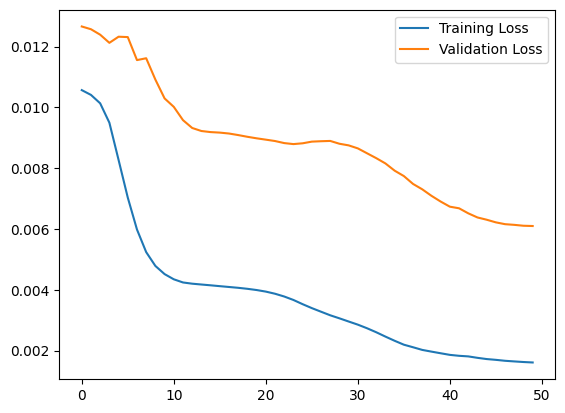

In [12]:
# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [13]:
# Find the threshold
def find_threshold(model, X_train):
    reconstructions = model.predict(X_train)
    mse = np.mean(np.power(X_train - reconstructions, 2), axis=1)
    return np.percentile(mse, 95)

In [14]:
threshold = find_threshold(autoencoder, X_train_1)
print("Threshold: ", threshold)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Threshold:  0.009312101862162398


In [15]:
# Make predictions
def predict(model, X, threshold):
    reconstructions = model.predict(X)
    mse = np.mean(np.power(X - reconstructions, 2), axis=1)
    return mse < threshold

In [16]:
predictions = predict(autoencoder, X_test, threshold)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step


In [17]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ", accuracy)

Accuracy:  0.964
